# Исследование объявлений о продаже квартир



**ТЗ**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель**

Проанализировать рыночную стоимость объектов недвижимости разного типа для дальнейшего прогнозирования цены за 1 кв/м

## Read data

In [1]:
# настройка среды и открытие файлов

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)

sns.set_palette('deep') 
sns.set_style("whitegrid")


In [3]:
data = pd.read_csv('D:/other_work/Yandex_practicum/I_3_Modul_Grafics_conclusion/project/real_estate_data.csv', sep='\t')
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data_copy = data.copy(deep=True)    # создана копия таблицы
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Описание данных:
* airports_nearest 		— расстояние до ближайшего аэропорта в метрах (м)\n
* balcony 				— число балконов
* ceiling_height 			— высота потолков (м)
* cityCenters_nearest 	— расстояние до центра города (м)
* days_exposition 		— сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition 	— дата публикации
* floor 					— этаж
* floors_total 			— всего этажей в доме
* is_apartment 			— апартаменты (булев тип)
* kitchen_area 			— площадь кухни в квадратных метрах (м²)
* last_price 				— цена на момент снятия с публикации
* living_area 			— жилая площадь в квадратных метрах (м²)
* locality_name 			— название населённого пункта
* open_plan 				— свободная планировка (булев тип)
* parks_around3000 		— число парков в радиусе 3 км
* ponds_around3000 		— число водоёмов в радиусе 3 км
* ponds_nearest 			— расстояние до ближайшего водоёма (м)
* rooms 					— число комнат
* studio 					— квартира-студия (булев тип)
* total_area 				— общая площадь квартиры в квадратных метрах (м²)
* total_images 			— число фотографий квартиры в объявлении

In [5]:
print(data.info(memory_usage='deep'))
print(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

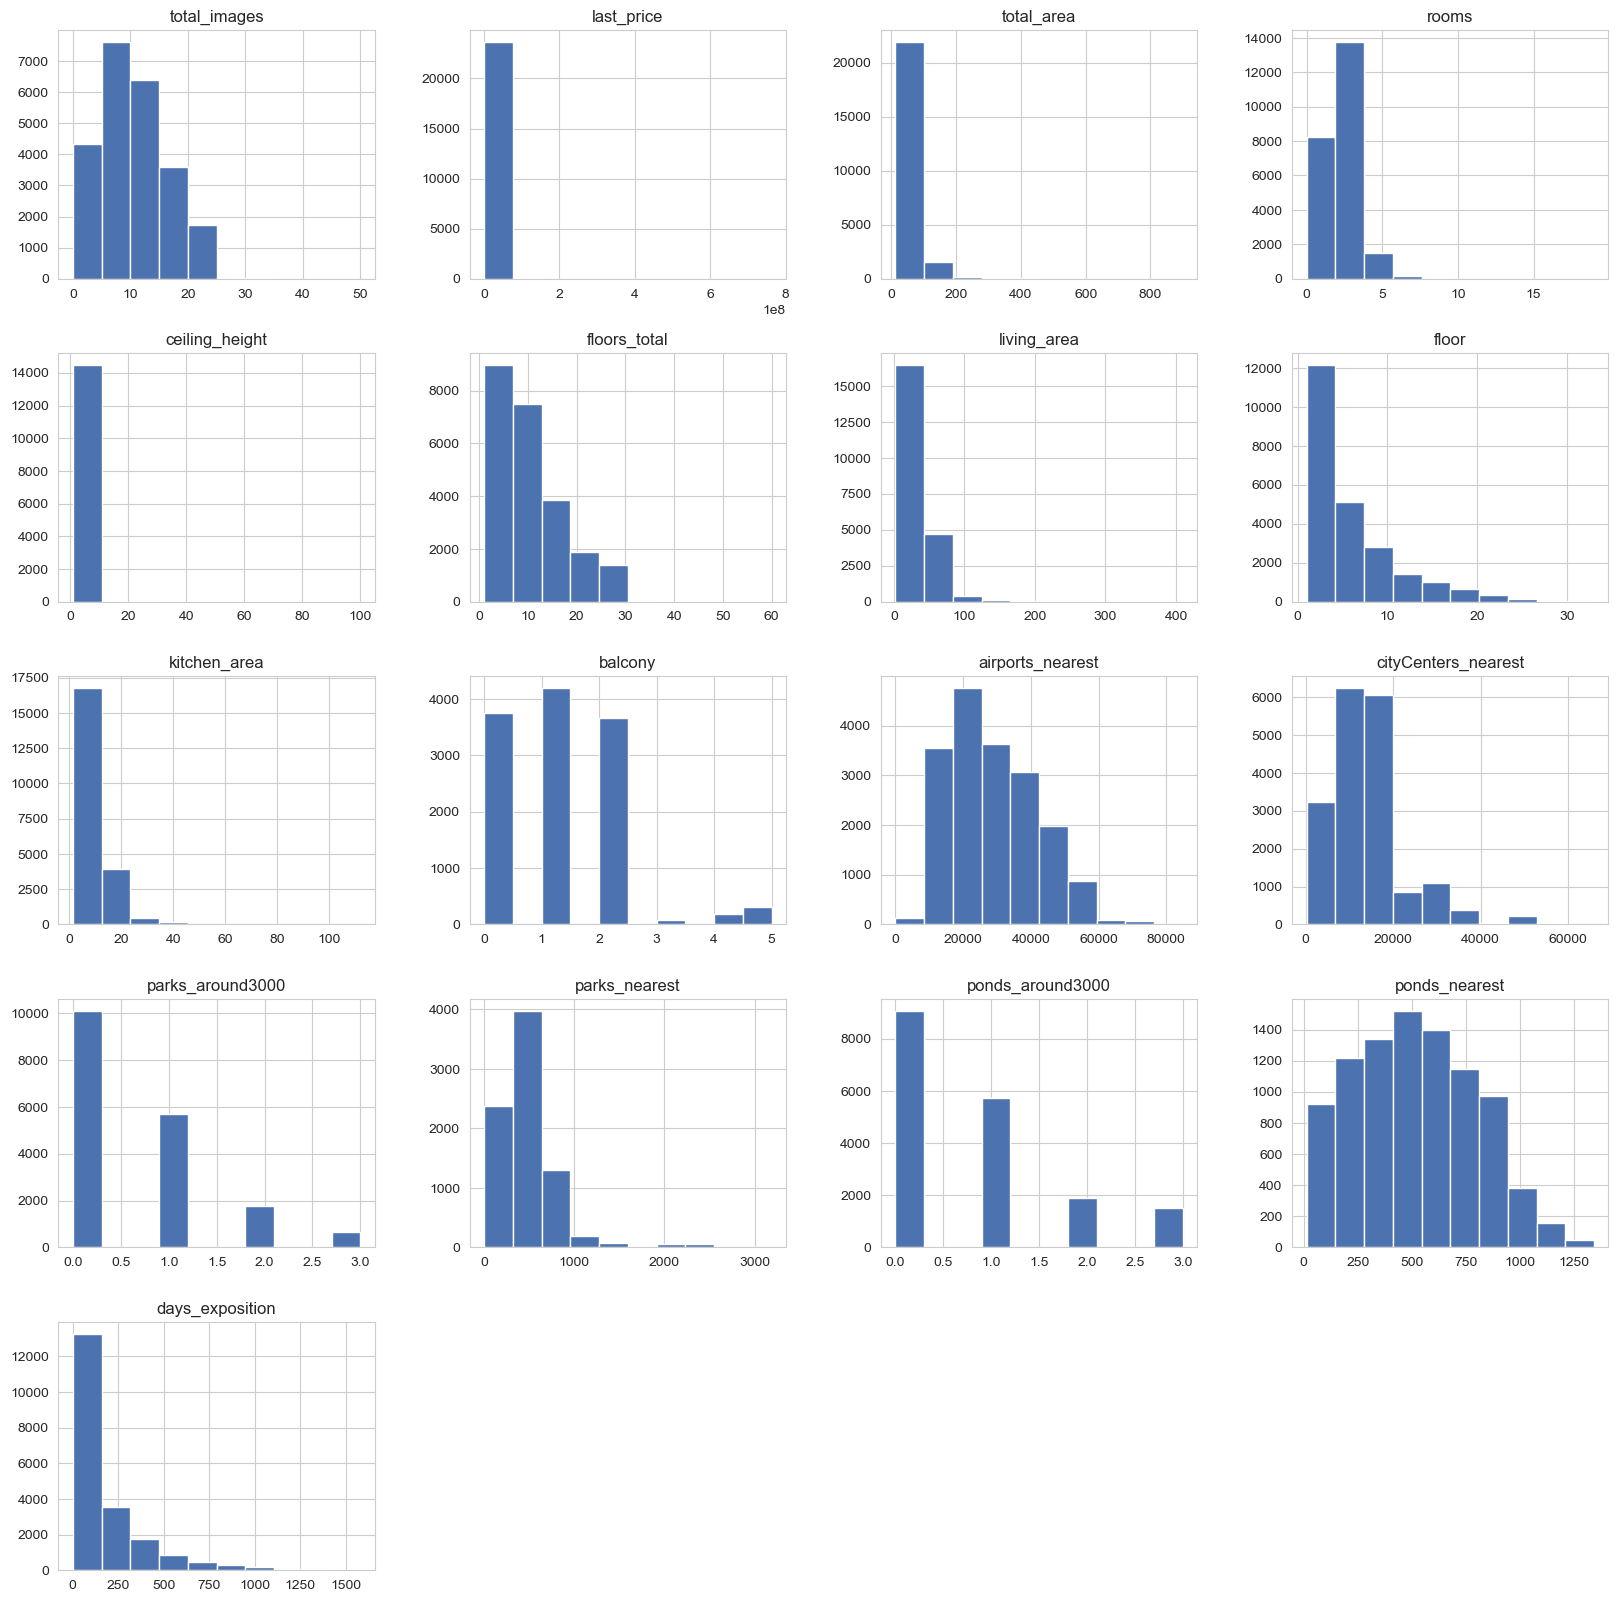

In [6]:
data.hist(figsize=(20,20));

В наших данных сразу можно отметить отсутсвие отрицательных значений.

### EDA

Основная тонкость - это наличие nan начений.
Поскольку NaN является числом с плавающей запятой, это приводит к тому, что массив целых чисел с любыми отсутствующими значениями становится с плавающей запятой. Т.е. некоторые целые числа даже не могут быть представлены как числа с плавающей запятой.


#### Работа с NaN и нулевыми значениями

In [7]:
df_data = []
for col in data.columns:
    column_na_values = data[col].isna().sum()
    column_zero_values = data[col][data[col] == 0].count()
    column_na_rate = column_na_values / data.shape[0]
    column_na_zero_rate = (column_na_values + column_zero_values) / data.shape[0]
    df_data.append([col, column_na_values, column_zero_values, column_na_rate, column_na_zero_rate])

df_res = pd.DataFrame(data=df_data, columns=['Имя столбца', 'Кол-во NaN', 'Кол-во значений 0', 'Процент значений NaN', 'Процент значений 0+NaN'])
print('всего строк = ', data.shape[0])
df_res


всего строк =  23699


,Имя столбца,Кол-во NaN,Кол-во значений 0,Процент значений NaN,Процент значений 0+NaN
0,total_images,0,1059,0.000000,0.044685
1,last_price,0,0,0.000000,0.000000
2,total_area,0,0,0.000000,0.000000
3,first_day_exposition,0,0,0.000000,0.000000
4,rooms,0,197,0.000000,0.008313
5,ceiling_height,9195,0,0.387991,0.387991
6,floors_total,86,0,0.003629,0.003629
7,living_area,1903,0,0.080299,0.080299
8,floor,0,0,0.000000,0.000000
9,is_apartment,20924,2725,0.882906,0.997890


Мы видим , что у нас очень много пропусков в таблице. Ниже проработаем с каждым из них


Проанализируем все колонки

* airports_nearest 		— расстояние до ближайшего аэропорта в метрах (м)\n
<font color='grey'><b>кол-во NaN = 23% - В ленинградской области и Питере есть аэропорт. Точный адрес квартиры мы не знаем. Нужно проанализировать это поле, возможно есть зависимость с продажами, тогда эту колонку лучше заполнить как "нет информации", иначе может пострадать статистика , т.к. кол-во пропусков велика . Т.е. оставляем как есть </b></font><br>
* balcony 				— число балконов
<font color='grey'><b>кол-во NaN 11519 = 48 %, либо их нет, либо просто не заполнили. На данном этапе оставляем как есть. Корреляцию на данном этапе (с кол-вом комнат/студией и тд) найти тоже сложно. Интуитивно, в Санкт-Петербурге и Ленинградской области объектов с балконами должно быть больше. Если где-то это поле встретится в анализе, в графиках и т.д., то можно заполнить как «нет информации». Т.е. на данном этапе оставляем как есть</b></font><br>
* ceiling_height 			— высота потолков (м)
<font color='blue'><b>кол-во NaN 9195 = 38 %, должна быть заполнена, т.к. не может быть равна 0. здесь логичнее всего заполнить средним значением исходя из гистограммы. Медиана не сильно от среднего отличается  </b></font><br>
* cityCenters_nearest 	— расстояние до центра города (м)
<font color='grey'><b>кол-во NaN 5519 = 23% Тоже большой процент, а вот значения 0 - отсутствуют. В Питере центром города считается Невский проспект и окрестности, и там есть водоемы и р Нева. А вот до аэропорта очень далеко. Оставляем пока так на данном этапе, расстояние до центра города очень влияет на стоимость кв , на данном этапе лучше так не рисковать с 23 % </b></font><br>
* days_exposition 		— сколько дней было размещено объявление (от публикации до снятия)
<font color='grey'><b>кол-во NaN 3181 = 13%, объявления все закрыты (исходя из заполненности last_price) значит должно быть заполнено. 13% - не особо много, и у нас есть кв которые продавались очень долго. В среднем кв продаются от 2 до 7 месяцев (исходя из открытых источников) , и по гистограмме первичной у нас это тоже заметно. С другой стороны объявления могут быть ошибочно размещенные.
    Необходимо рассчитать корреляцию между продолжительностью объявления и конечной ценой, и найти зависимость. 13 % не так уж и много, но лучше подстраховаться и оставляем так </b></font><br>
* first_day_exposition 	— дата публикации
<font color='green'><b>0% </b></font><br>
* floor 					— этаж
<font color='green'><b> 0% </b></font><br>
* floors_total 			— всего этажей в доме
<font color='blue'><b>кол-во NaN 86 = 0.3%, очень маленький процент, заполним ее медианой, не повлияет на статистику</b></font><br>
* is_apartment 			— апартаменты (булев тип)
<font color='grey'><b>кол-во NaN 20924 = 88% , Очень много пропусков ! Оставляем как есть , вернемся к ней позже </b></font><br>
* kitchen_area 			— площадь кухни в квадратных метрах (м²)
<font color='blue'><b>кол-во NaN 2278 = 9% -  в кв кухня должна быть обязательна, за исключением аппартаментов, но с другой стороны ее можно вычислить как общая площадь - жилая . 9% процентов не так много для основной статистики поэтому небольшая погрешность в кухне будет допустима</b></font><br>
* last_price 				— цена на момент снятия с публикации
<font color='green'><b>отличная колонка 0% - она мне однозначно нравится</b></font><br>
* living_area 			— жилая площадь в квадратных метрах (м²)
<font color='blue'><b>1903 = 8% , можно расчитать как total_area-kitchen_area, возможно так пропусков будет меньше... </b></font><br>
* locality_name 			— название населённого пункта
<font color='blue'><b>49 = 0.2% - заполнить значением "Другой" (не оставлять же без названия, и процент очень маленький)</b></font><br>
* open_plan 				— свободная планировка (булев тип)
<font color='green'><b>отличная колонка 0%. заполнено все. Это бул и 0 - это нормально</b></font><br>
* parks_around3000 		— число парков в радиусе 3 км
<font color='grey'><b>кол-во NaN 5518 = 23% ???</b></font><br>
* ponds_around3000 		— число водоёмов в радиусе 3 км
<font color='grey'><b>кол-во NaN 5518 = 23% ??? одинаковое кол-во с числом парков</b></font><br>
* ponds_nearest 			— расстояние до ближайшего водоёма (м)
<font color='grey'><b>14589 = 61% найти corr с числом водоемов???</b></font><br>
* rooms 					— число комнат
<font color='blue'><b>отличная колонка 0%. А там где 0 (и процент маленький)- скорее это студия и заполняем тогда 1</b></font><br>
* studio 					— квартира-студия (булев тип)
<font color='green'><b>0% </b></font><br>
* total_area 				— общая площадь квартиры в квадратных метрах (м²)
<font color='green'><b> 0% </b></font><br>
* total_images 			— число фотографий квартиры в объявлении
<font color='green'><b> 0% . А кол-во квартир без фотографий (0) пока без изменения, возможно это нам пригодиться далее в статистике</b></font><br>


Интересная зависимость:
Для ponds_around3000 / parks_around3000 / cityCenters_nearest кол-во пропусков NaN одинаковое.
Для начала заполним явные пропуски(обозначенные синим цветом)


In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['locality_name'] = data['locality_name'].fillna('Другой')
data['rooms'] = data['rooms'].replace(0, 1)



Работа с колонкой living_area и kitchen_area

In [9]:
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']
print(data['living_area'].isna().sum())

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']
print(data['kitchen_area'].isna().sum())

1464
1464


П.с с одной стороны - это не совсем правильный способ замены пропусков, так как в нежилую площадь входит не только кухня, но и коридоры, кладовки и санузел, но с другой стороны у нас не хватает данных , поэтому на данном этапе оставляем такой способ 

Видим что кол-во NaN kitchen_area / living_area сократилось, но не настолько как хотелось бы. Странно что у нас есть в таблице аппартаменты, а вот жилая площадь с 0 значениями отсутствует (как мы знаем аппартаменты в основном - это нежилые помещения). Давайте посмотрим корреляцию между жилой площадью и общей. 
Заполним 0 где living_area = Nan и это аппартаменты

In [10]:
print('корреляция между жилой площадью и общей =', data['living_area'].corr(data['total_area']))
# т.к. корреляция очень высокая 

data.loc[(data['living_area'].isna()) & (data['is_apartment'] == True), 'living_area'] = data['living_area'].fillna(0)

print(data['living_area'].isna().sum())



корреляция между жилой площадью и общей = 0.9348721315497742
1458


Проанализируем снова нашу таблицу на NaN и 0

In [11]:
df_data = []
for col in data.columns:
    column_na_values = data[col].isna().sum()
    column_zero_values = data[col][data[col] == 0].count()
    column_na_rate = column_na_values / data.shape[0]
    column_na_zero_rate = (column_na_values + column_zero_values) / data.shape[0]
    df_data.append([col, column_na_values, column_zero_values, column_na_rate, column_na_zero_rate])

df_res = pd.DataFrame(data=df_data, columns=['Имя столбца', 'Кол-во NaN', 'Кол-во значений 0', 'Процент значений NaN', 'Процент значений 0+NaN'])
print('всего строк = ', data.shape[0])
df_res

всего строк =  23699


,Имя столбца,Кол-во NaN,Кол-во значений 0,Процент значений NaN,Процент значений 0+NaN
0,total_images,0,1059,0.000000,0.044685
1,last_price,0,0,0.000000,0.000000
2,total_area,0,0,0.000000,0.000000
3,first_day_exposition,0,0,0.000000,0.000000
4,rooms,0,0,0.000000,0.000000
5,ceiling_height,0,0,0.000000,0.000000
6,floors_total,0,0,0.000000,0.000000
7,living_area,1458,6,0.061522,0.061775
8,floor,0,0,0.000000,0.000000
9,is_apartment,20924,2725,0.882906,0.997890


Проанализируем еще раз колонку is_apartment - она очень сильно выбивается из данных.
- Можно предположить что незаполненные значения - это квартиры, но есть 50 объявлений со значением TRUE
- значит, просто так заполнить NAN значениями FALSE нельзя, обработку пропущенных значений делать не будем

In [12]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

#### Работа с типом данных, обработка

Количество NaN значений уменьшилось, теперь самое время проанализировать тип данных, как писал выше

In [13]:
for col in sorted(data.columns):
    print(col, ': ', data[col].dtypes)

airports_nearest :  float64
balcony :  float64
ceiling_height :  float64
cityCenters_nearest :  float64
days_exposition :  float64
first_day_exposition :  object
floor :  int64
floors_total :  float64
is_apartment :  object
kitchen_area :  float64
last_price :  float64
living_area :  float64
locality_name :  object
open_plan :  bool
parks_around3000 :  float64
parks_nearest :  float64
ponds_around3000 :  float64
ponds_nearest :  float64
rooms :  int64
studio :  bool
total_area :  float64
total_images :  int64



Начнем анализ

* airports_nearest 		— расстояние до ближайшего аэропорта в метрах (м)\n
<font color='DarkBlue'><b>float64 - Ok</b></font><br>
* balcony 				— число балконов
<font color='DarkBlue'><b>float64 - NOk, но есть NaN - оставляем</b></font><br>
* ceiling_height 			— высота потолков (м)
<font color='DarkBlue'><b>float64 - Ok</b></font><br>
* cityCenters_nearest 	— расстояние до центра города (м)
<font color='DarkBlue'><b>float64 - Ok</b></font><br>
* days_exposition 		— сколько дней было размещено объявление (от публикации до снятия)
<font color='DarkBlue'><b>float64 - NOk, но есть NaN - оставляем</b></font><br>
* first_day_exposition 	— дата публикации
<font color='Red'><b>object - NOk, перевести в datetime, это время поэтому лучше использовать datetime</b></font><br>
* floor 					— этаж
<font color='DarkBlue'><b>int64 - Ok</b></font><br>
* floors_total 			— всего этажей в доме
<font color='Red'><b>float64 - NOk, перевести в int, не может быть дробного значения</b></font><br>
* is_apartment 			— апартаменты (булев тип)
<font color='DarkBlue'><b>object - NOk, но есть NaN - оставляем </b></font><br>
* kitchen_area 			— площадь кухни в квадратных метрах (м²)
<font color='DarkBlue'><b>float64 - Ok + есть NaN - оставляем</b></font><br>
* last_price 				— цена на момент снятия с публикации
<font color='DarkBlue'><b>float64 - Ok</b></font><br>
* living_area 			— жилая площадь в квадратных метрах (м²)
<font color='DarkBlue'><b>float64 - Ok</b></font><br>
* locality_name 			— название населённого пункта
<font color='DarkBlue'><b>object - Ok</b></font><br>
* open_plan 				— свободная планировка (булев тип)
<font color='DarkBlue'><b>bool  - Ok</b></font><br>
* parks_around3000 		— число парков в радиусе 3 км
<font color='DarkBlue'><b>float64 - NOk, но есть NaN - оставляем</b></font><br>
* ponds_around3000 		— число водоёмов в радиусе 3 км
<font color='DarkBlue'><b>float64 - NOk, но есть NaN - оставляем</b></font><br>
* ponds_nearest 			— расстояние до ближайшего водоёма (м)
<font color='DarkBlue'><b>float64 - NOk, но есть NaN - оставляем</b></font><br>
* rooms 					— число комнат
<font color='DarkBlue'><b>int64 - Ok</b></font><br>
* studio 					— квартира-студия (булев тип)
<font color='DarkBlue'><b>bool - Ok</b></font><br>
* total_area 				— общая площадь квартиры в квадратных метрах (м²)
<font color='DarkBlue'><b>float64 - Ok</b></font><br>
* total_images 			— число фотографий квартиры в объявлении
<font color='DarkBlue'><b>int64 - Ok</b></font><br>

**Все что отмечено красным - исправляем**

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')

data.dtypes


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Nan на месте, больше не стало. Тип данных привели в нужный. А вот интересное наблюдение: datetime64 отбросил часы минуты сек т.к. значения были все установлены в 00:00:00 но и время нам особо не важно здесь, главное это дата.

#### Работа с неявными дубликатами

Давайте разберемся с устранением неявных дубликатов в названиях населённых пунктов
- смотрим уникальные значения
- перевод всех значений locality_name в нижний регистр
- замена Ё на Е
- замена городской поселок -> поселок городского типа

In [15]:
print(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок городского типа', regex=True)

print(len(data['locality_name'].unique()))
print(data['locality_name'].unique())


365
324
['санкт-петербург' 'поселок шушары' 'поселок городского типа янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'дер

Видим что кол-во уникальных значений уменьшилось.

#### Устранение редких и выбивающиеся значения (аномалий) во всех столбцах

Работа с колонкой last_price
- удалим аномально низкую стоимость

In [16]:
print(data.shape[0], data['last_price'].isna().sum(), data['last_price'].min(), data['last_price'].max())
drop_index = data[(data['last_price'] < 430000)].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['last_price'].isna().sum(), data['last_price'].min(), data['last_price'].max())

# посмотрим сколько объявлений выше 600 млн руб. Возможно это замок, а может и реально такая продажа
# одна запись , причем правдоподобная
data.query('last_price > 600000000')
drop_index = data[(data['last_price'] > 600000000)].index
data.drop(drop_index, inplace=True)
print(data.shape[0], data['last_price'].isna().sum(), data['last_price'].min(), data['last_price'].max())


23699 0 12190.0 763000000.0
23698 0 430000.0 763000000.0
23697 0 430000.0 420000000.0


In [17]:
# посмотрим сроки размещения объявлений
print(data['first_day_exposition'].min(), data['first_day_exposition'].max())

2014-11-27 00:00:00 2019-05-03 00:00:00


Видим что выборка сделана за 5 лет

Работа с колонкой ceiling_height
- посмотрим уникальные значения
- видим что в некоторых полях заполнены значения вида: 26, 27 м. Возможно человек торопился и случайно забыл поставить запятую, исправим это.
- удалим все значения которые не попадают под условие `2.4 < ceiling_height < 4.5` т.к это высота потолка которая принята в строительстве

In [18]:
print(data.shape[0], data['ceiling_height'].isna().sum(), data['ceiling_height'].min(), data['ceiling_height'].max())

#print(sorted(data['ceiling_height'].unique()))
data['ceiling_height'] = data['ceiling_height'].replace([22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0], [2.26, 2.40, 2.50, 2.60, 2.70, 2.75, 3.20])


drop_index = data[(data['ceiling_height'] > 4.5) | (data['ceiling_height'] < 2.4)].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['ceiling_height'].isna().sum(), data['ceiling_height'].min(), data['ceiling_height'].max())



23697 0 1.0 100.0
23654 0 2.4 4.5


Работа с floors_total
- удалим здания с этажностью выше 35 этаже, т.к. в Санкт-Петербурге нет жилых зданий выше 37 этажей, есть только бизнесс центр Лахта (построенный в 2019 году) с этажностью в 88 этажей

In [19]:
print(data.shape[0], data['floors_total'].isna().sum(), data['floors_total'].min(), data['floors_total'].max())
drop_index = data[data['floors_total'] > 35].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['floors_total'].isna().sum(), data['floors_total'].min(), data['floors_total'].max())



23654 0 1 60
23649 0 1 35


Работа с колонкой living_area
- Удалим объявления где living_area < 8м если это не студия и не аппартаменты

In [20]:
print(data.shape[0], data['living_area'].isna().sum(), data['living_area'].min(), data['living_area'].max())
drop_index = data[(data['living_area'] < 8) & (data['studio'] == False) & (data['is_apartment'].isna())].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['living_area'].isna().sum(), data['living_area'].min(), data['living_area'].max())
#print(data.sort_values(['living_area'], ascending=True).head(20))



23649 1452 0.0 571.0
23643 1452 0.0 571.0


Работа с колонкой kitchen_area
- удалим объявления с площадью кухни < 5м если это не студия и не аппартаменты

In [21]:

print(data.shape[0], data['kitchen_area'].isna().sum(), data['kitchen_area'].min(), data['kitchen_area'].max())
drop_index = data[(data['kitchen_area'] < 5) & (data['studio'] == False) & data['is_apartment'].isna()].index
data.drop(drop_index, inplace=True)

drop_index = data[(data['kitchen_area'] < 5) & (data['studio'] == False) & (data['is_apartment'] == False)].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['kitchen_area'].isna().sum(), data['kitchen_area'].min(), data['kitchen_area'].max())





23643 1458 0.0 230.0
23515 1458 2.0 230.0


Работа с колонкой airports_nearest
- удалим колонку со значением 0 м

In [22]:
print(data.shape[0], data['airports_nearest'].isna().sum(), data['airports_nearest'].min(), data['airports_nearest'].max())
drop_index = data[(data['airports_nearest'] == 0)].index
data.drop(drop_index, inplace=True)
print(data.shape[0], data['airports_nearest'].isna().sum(), data['airports_nearest'].min(), data['airports_nearest'].max())


23515 5481 0.0 84869.0
23514 5481 6450.0 84869.0


Анализ колонки parks_nearest
- Уберем объявления , где расстояние до ближайшего парка менее 10 м
- уберем объявления , где кол-во парков > 1 и расстояние до парков менее 30 м

In [23]:
print(data.shape[0], data['parks_nearest'].isna().sum(), data['parks_nearest'].min(), data['parks_nearest'].max())
drop_index = data[(data['parks_nearest'] < 10)].index
data.drop(drop_index, inplace=True)

drop_index = data[(data['parks_nearest'] < 30) & (data['parks_around3000'] > 1)].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['parks_nearest'].isna().sum(), data['parks_nearest'].min(), data['parks_nearest'].max())




23514 15489 1.0 3190.0
23464 15489 10.0 3190.0


Работа с колонкой ponds_nearest
- уберем объявлеиня где расстояние до водоема менее 50 м
- уберем объявления где кол-во водоем > 1 и расстояние менее 100 м

In [24]:
print(data.shape[0], data['ponds_nearest'].isna().sum(), data['ponds_nearest'].min(), data['ponds_nearest'].max())

drop_index = data[(data['ponds_nearest'] < 50)].index
data.drop(drop_index, inplace=True)

drop_index = data[(data['ponds_nearest'] < 100) & (data['ponds_around3000'] > 1)].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['ponds_nearest'].isna().sum(), data['ponds_nearest'].min(), data['ponds_nearest'].max())


23464 14469 13.0 1344.0
23135 14469 50.0 1344.0


Работа с колонкой days_exposition
- у нас есть объявления которые висели > 3 лет
- у нас есть объявления которые висели 1-5 дня, возможно эти объявления были вывешены случайно (или не с целью продажи), давайте удалим их

In [25]:
print(data.shape[0], data['days_exposition'].isna().sum(), data['days_exposition'].min(), data['days_exposition'].max())
drop_index = data[(data['days_exposition'] < 6)].index
data.drop(drop_index, inplace=True)

print(data.shape[0], data['days_exposition'].isna().sum(), data['days_exposition'].min(), data['days_exposition'].max())



23135 3105 1.0 1580.0
22652 3105 6.000000000000001 1580.0


Работа с колонкой rooms

In [26]:
print(data.shape[0], data['rooms'].isna().sum(), data['rooms'].min(), data['rooms'].max())
data.query('rooms > 15')
drop_index = data[(data['rooms'] > 15)].index
data.drop(drop_index, inplace=True)
print(data.shape[0], data['rooms'].isna().sum(), data['rooms'].min(), data['rooms'].max())

22652 0 1 19
22650 0 1 15


Работа с колонкой total_area

In [27]:
print(data.shape[0], data['total_area'].isna().sum(), data['total_area'].min(), data['total_area'].max())
data.query('total_area > 600')
drop_index = data[(data['total_area'] > 600)].index
data.drop(drop_index, inplace=True)
print(data.shape[0], data['total_area'].isna().sum(), data['total_area'].min(), data['total_area'].max())

22650 0 13.0 900.0
22646 0 13.0 590.0


В итоге у нас получилось 22647 записи. Довольно неплохо чтобы сделать полноценный анализ

In [28]:
print(data.shape[0])
print(data_copy.shape[0])
print('количество отбрасываемых данных не првышает 10 % =', 100 - data.shape[0] / data_copy.shape[0]*100)  

22646
23699
количество отбрасываемых данных не првышает 10 % = 4.443225452550735


### Add new columns 

#### Рассчет и добавление в таблицу: цена одного квадратного метра

Добавим колонку "price_one_metre" для каждого объявления.
Она будет рассчитываться по формуле: 

`price_one_metre = last_price / total_area`

In [29]:
data = data.assign(price_one_metre=lambda x: x['last_price']/x['total_area']).round(2)
print(data.shape[0], data['price_one_metre'].isna().sum(), data['price_one_metre'].min(), data['price_one_metre'].max())

#print(data.head())

22646 0 7962.96 1736842.11


#### посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)**

Добавим колонку day. Для этого из колонки first_day_exposition извлекем эти данные


In [30]:
print(data['first_day_exposition'].dtypes)

data = data.assign(day = lambda x: x['first_day_exposition'].dt.weekday)
print(data.shape[0], data['day'].isna().sum(), data['day'].min(), data['day'].max())

#print(data.head())

datetime64[ns]
22646 0 0 6


#### Посчитано и добавлено в таблицу: месяц публикации объявления**

Добавим колонку month . Для этого из колонки first_day_exposition извлекем эти данные

In [31]:
data = data.assign(month = lambda x: x['first_day_exposition'].dt.month)
print(data.shape[0], data['month'].isna().sum(), data['month'].min(), data['month'].max())

#print(data.head())

22646 0 1 12


#### посчитано и добавлено в таблицу: год публикации объявления**

Добавим колонку year . Для этого из колонки first_day_exposition извлекем эти данные

In [32]:
data = data.assign(year = lambda x: x['first_day_exposition'].dt.year)
print(data.shape[0], data['year'].isna().sum(), data['year'].min(), data['year'].max())

#print(data.head())

22646 0 2014 2019


#### посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)**

Колонка будет называться type_floors. 

<font color='grey'><b> Если floor = 1 - первый  </b></font><br>
<font color='grey'><b> Если floor = floors_total - последний  </b></font><br>
<font color='grey'><b> Иначе другой  </b></font><br>



In [33]:
def type_floors(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['type_floors'] = data.apply(type_floors, axis=1)



#### посчитано и добавлено в таблицу: расстояние в км до центра города**

У нас по прежнему 5367 пропусков в колонке cityCenters_nearest. Давайте попробуем еще немного заполнить пропущенные значения:
если данные не заполнены и это деревня/поселок/или другой населенный пункт - будем считать что расстояние до центра города 20000 м

Потом добавим колонку cityCenters_kilometers ,которая будет рассчитана как cityCenters_nearest/1000

In [34]:
def empty_citycentre(row):
    if ('поселок' in row) or ('деревня' in row) or ('другой' in row):
            return True
            
print(data.shape[0], data['cityCenters_nearest'].isna().sum(), data['cityCenters_nearest'].min(), data['cityCenters_nearest'].max())
data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'].apply(empty_citycentre) == True), 'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(20000)
print(data.shape[0], data['cityCenters_nearest'].isna().sum(), data['cityCenters_nearest'].min(), data['cityCenters_nearest'].max())


data = data.assign(cityCenters_kilometers = lambda x: x['cityCenters_nearest']/1000).round(0)
print(data.shape[0], data['cityCenters_kilometers'].isna().sum(), data['cityCenters_kilometers'].min(), data['cityCenters_kilometers'].max())




22646 5367 181.0 65968.0
22646 2757 181.0 65968.0
22646 2757 0.0 66.0


Отлично, кол-во пропущенных значений в колонке cityCenters_nearest снизилось в 2 раза, а максимальное расстояние до центра города = 66 км

### Data analysis

Построим гистограммы для параметров ниже и изучим их
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

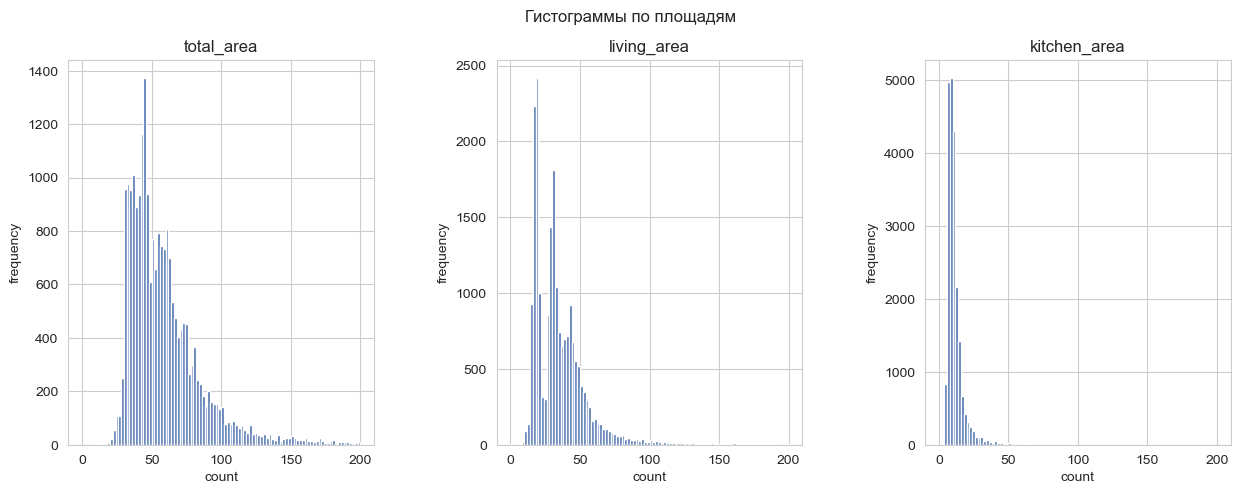

In [35]:
col = ['total_area', 'living_area', 'kitchen_area']

fig = plt.figure(figsize = (15, 5))
fig.suptitle('Гистограммы по площадям')
fig.subplots_adjust(wspace = 0.4)

for _ in range(len(col)):
    ax = fig.add_subplot(1, 3, _+1)
    data[col[_]].plot(kind='hist', bins=100, range=(0, 200), grid=True)
    ax.set_xlabel('count')
    ax.set_ylabel('frequency')
    ax.set_title(col[_])
    

Видим что в Питере/области в основном пользуются популярностью однушки/студии с небольшой площадью кухни.
Общая площадь - среднее значение 52 м2, а медиана 60 м2. Но на графике мы видим что много обяъевлений с площадью 30-40 м2

last_price = 4605003.0 6379856.3
rooms =  2.0 2.1


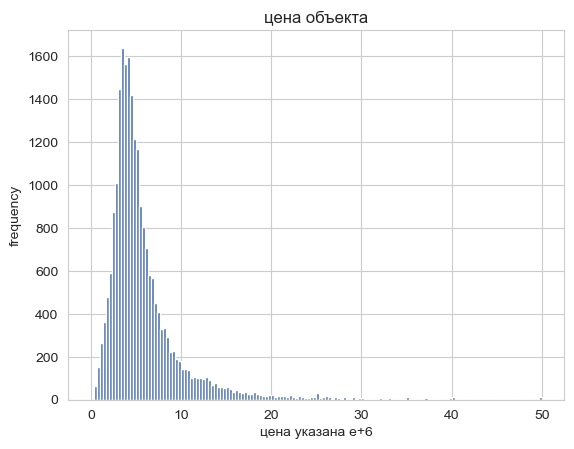

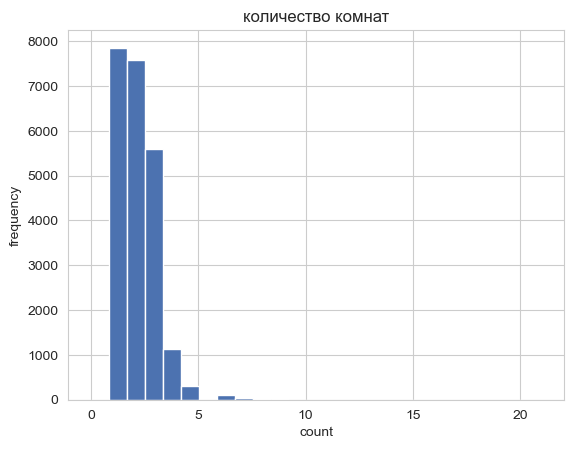

In [36]:
print('last_price =', data['last_price'].median(), data['last_price'].mean().round(1))
print('rooms = ', data['rooms'].median(), data['rooms'].mean().round(1))

#plt.xlim([1, 3.000000e+07])
(data['last_price']/1000000).plot(kind='hist', bins=150, grid=True, range=(0, 50))
plt.xlabel('цена указана e+6')
plt.ylabel('frequency')
plt.title('цена объекта')
plt.show()

data['rooms'].plot(kind='hist', bins=25, grid=True, range=(0, 21))
plt.xlabel('count')
plt.ylabel('frequency')
plt.title('количество комнат')
plt.show()




Как и упоминалось ранее больше всего пользуются спросом 1ые квартиры, следом идут 2ые . Здесь лучше смотреть на график а не на среднее значение

Цены (last_price) имеют среднее значение в ~6.5 млн руб., а вот медиана 4,6 млн руб. Т.е. цена от 4-5 млн самая ходовая.




- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;

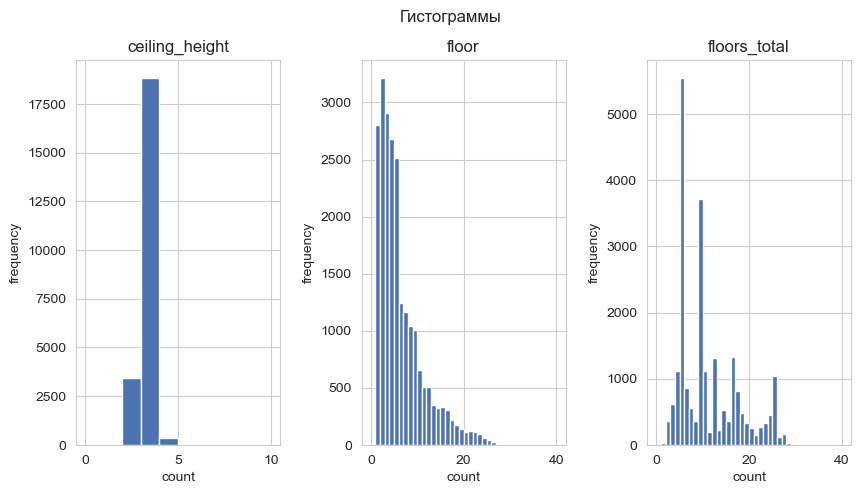

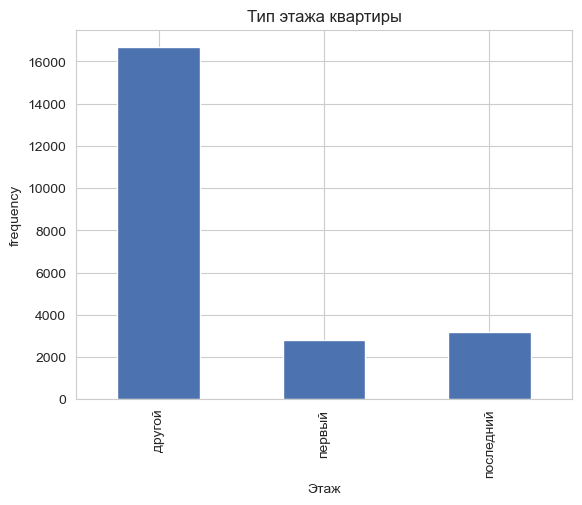

In [38]:


col = ['ceiling_height', 'floor' , 'floors_total']

fig = plt.figure(figsize = (10, 5))
fig.suptitle('Гистограммы')
fig.subplots_adjust(wspace = 0.4)


for _ in range(len(col)):
    if col[_] == 'ceiling_height':
        bins = 10
        ranges = (0,10)
    else :
        bins = 40
        ranges = (0,40)
    ax = fig.add_subplot(1, 3, _+1)
    data[col[_]].plot(kind='hist', bins=bins, range=ranges, grid=True)
    ax.set_xlabel('count')
    ax.set_ylabel('frequency')
    ax.set_title(col[_])
plt.show()

data_t_floors = data.groupby('type_floors')['type_floors'].count()
data_t_floors.plot(kind='bar', title='Тип этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('frequency')
plt.show()


Видим что люди предпочитают больше квартиры со стандартными потолками, 2-4 этаж (т.е. другой). А вот общее кол-во этажей в доме не особо играет роль: кто-то предпочитает жить пониже, кто-то повыше, но в целом больше продают с этажностью в 5-10 этажей. Меньше объявлений с первым и последним этажом


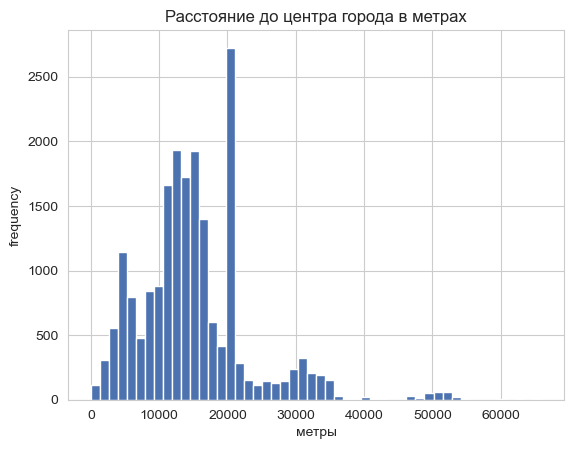

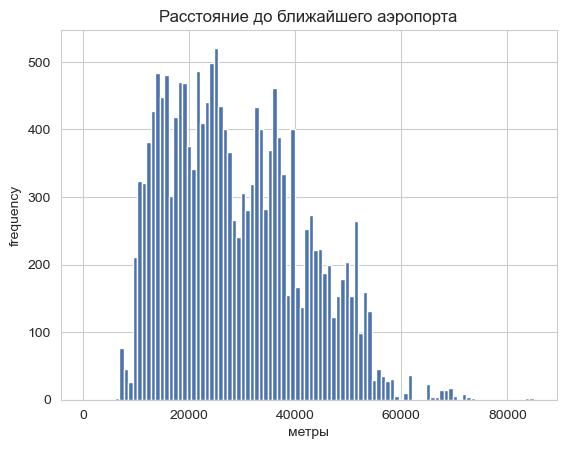

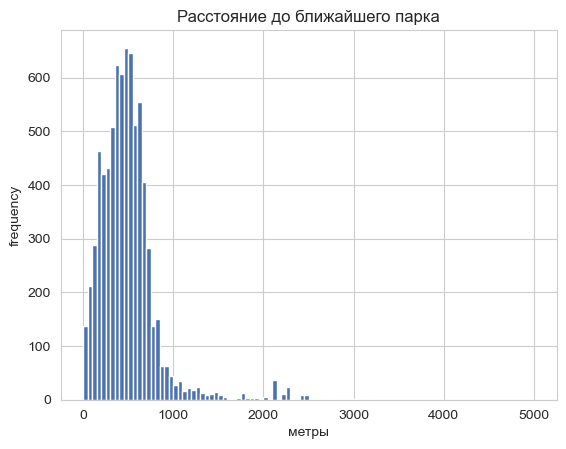

In [39]:

#plt.xlim([1, 66000])
data['cityCenters_nearest'].plot(kind='hist', bins=50, range=(0, 66000), grid=True, title='Расстояние до центра города в метрах'); 
plt.xlabel('метры')
plt.ylabel('frequency')
plt.show()

data['airports_nearest'].plot(kind='hist', bins=100, range=(0, 85000), grid=True, title='Расстояние до ближайшего аэропорта'); 
plt.xlabel('метры')
plt.ylabel('frequency')
plt.show()

data['parks_nearest'].plot(kind='hist', bins=100, range=(0, 5000), grid=True, title='Расстояние до ближайшего парка');
plt.xlabel('метры')
plt.ylabel('frequency')
plt.show()

Видим что больше объявлений с квартирами от 15-17 км до центра города - это значит окраина города, также есть определенное большое кол-во запросов с недвижимостью в деревнях и поселках.Есть небольшой всплеск с расстоянием 20000м - это как раз те объявления которые подошли под категорию деревня/поселок.
Люди не торопятся продавать свои квартиры в центре города.
Но зато парки в шаговой доступности у большинства объявлений. 
А вот что касается аэропортов основной разброс идет от 10 до 40 км

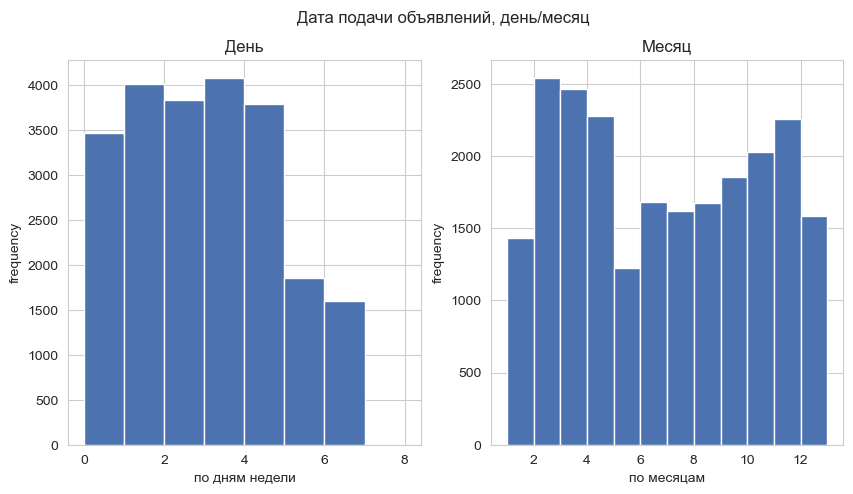

In [40]:

fig = plt.figure(figsize = (10,5))
fig.suptitle('Дата подачи объявлений, день/месяц') 

ax1 = fig.add_subplot(1, 2, 1)
data['day'].plot(kind='hist', bins=8, range=(0, 8), grid=True, title='день')
ax1.set_xlabel('по дням недели')
ax1.set_ylabel('frequency')
ax1.set_title('День')

ax2 = fig.add_subplot(1, 2, 2)
data['month'].plot(kind='hist', bins=12, range=(1, 13), grid=True, title='месяц')
ax2.set_xlabel('по месяцам')
ax2.set_ylabel('frequency')
ax2.set_title('Месяц')

plt.show()

- Видим что в основном люди выкладывают свои объявления в будние дни (с небольшим отрывом лидирует четверг)
- А вот что касается месяцев , то в мае и январе все на отдыхе и мало кто думает что-то продавать

**Анализ быстроты продажи квартир**

У нас по преднему есть объявления с незаполненными полями в days_exposition, хотя last_price заполнены полностью. Если мы заполним эти данные значением - поменяется статистика. Поэтому просто их не учитываем и оставляем как есть

In [41]:
print(data.shape[0], data['days_exposition'].isna().sum(), data['days_exposition'].min(), data['days_exposition'].max())
#drop_index = data[(data['days_exposition'].isna())].index
#print(data.shape[0], data['days_exposition'].isna().sum(), data['days_exposition'].min(), data['days_exposition'].max())

print('среднее продажи = ', data['days_exposition'].mean().round(2))
print('медиана продажи = ', data['days_exposition'].median())


22646 3103 6.0 1580.0
среднее продажи =  184.09
медиана продажи =  99.0


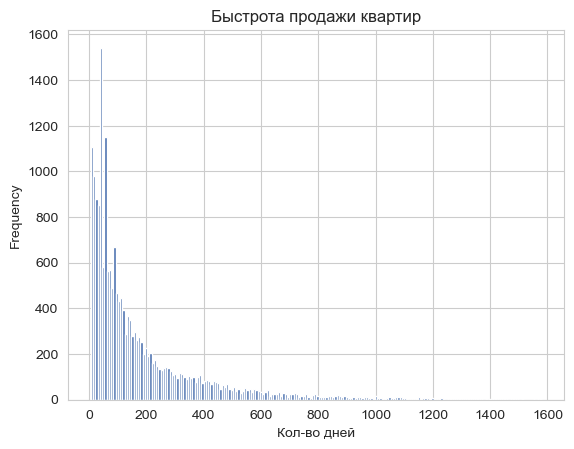

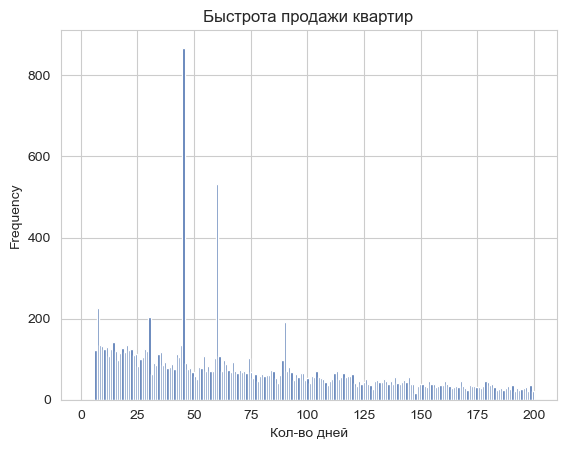

In [46]:
data['days_exposition'].plot(kind='hist', bins=200, grid=True, title='Быстрота продажи квартир')
plt.xlabel('Кол-во дней', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

data['days_exposition'].plot(kind='hist', bins=200, range = (1,200), grid=True, title='Быстрота продажи квартир', xlabel='кол-во дней')
plt.xlabel('Кол-во дней', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

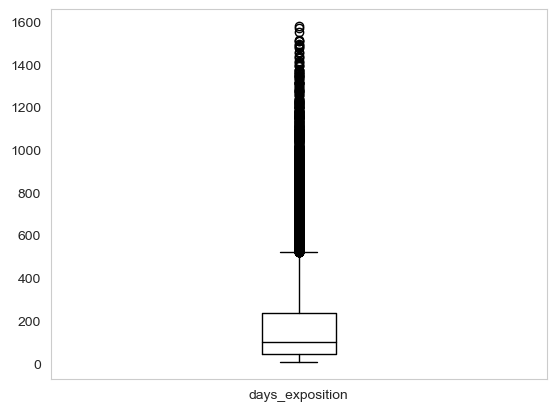

In [47]:
data.boxplot(column=['days_exposition'], grid= False , color='black') ;

**Интересное наблюдение:**
У нас есть выбивающие значения (аномалии) в 45/60/90 дней, а также чуть-чуть 30. Очень популярные значения. Если учитывать авито/яндекс недвижимость/домру - то у каждого объявления есть свой срок хранения и возможно что именно после данной продолжительности идет снятие (т.е. оно становится неактуальным), если объявление не обновить. Чтож, учтем данный фактор и исправим. Не будем учитывать эти дни, тем более никаких особенностей в этих днях нет.

Обычно продажи занимают в пределах 2-3 месяцев (до 100 дней). А вот среднее значение = 184 дня

Необычно долгие продажи занимают время от 200 дней.
Необычно быстрые продажи занимают время до 3 недель. 


Временно создадим новую таблицу `good_data`\
Это сделано для того, чтобы посмотреть как продажи (days_exposition, значения) влияют на среднюю/медиану при расчетах\
В дальнейших расчетах эта таблица не будет учавствовать и остается для полноты картины. 


22646
20853
среднее продажи =  197.38
медиана продажи =  116.0


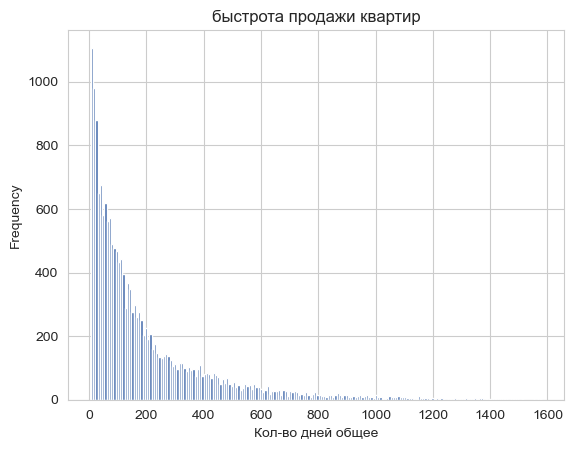

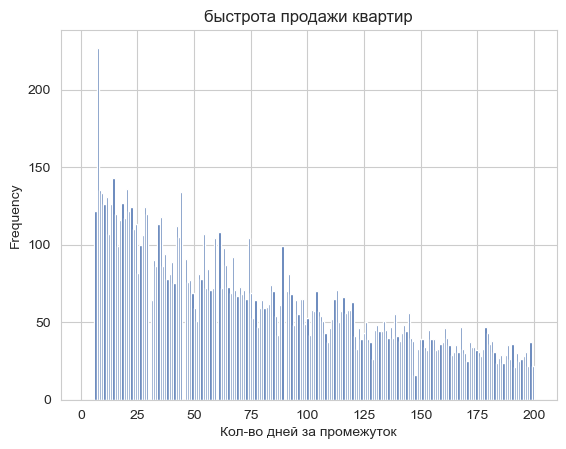

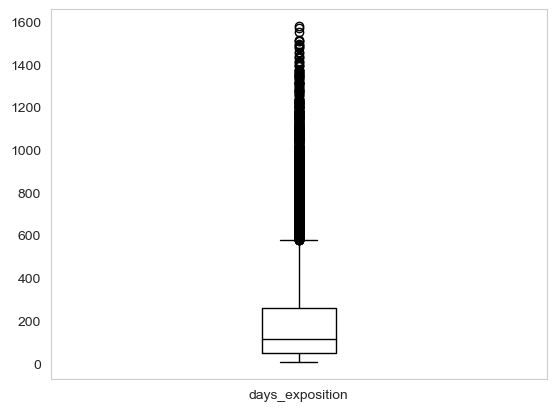

In [49]:
print(data.shape[0])
good_data = data.query('days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
print(good_data.shape[0])

print('среднее продажи = ', good_data['days_exposition'].mean().round(2))
print('медиана продажи = ', good_data['days_exposition'].median())

good_data['days_exposition'].plot(kind='hist', bins=200, grid=True, title='быстрота продажи квартир', xlabel='кол-во дней'); 
plt.xlabel('Кол-во дней общее')
plt.ylabel('Frequency')
plt.show()

good_data['days_exposition'].plot(kind='hist', bins=200, range = (1,200), grid=True, title='быстрота продажи квартир', xlabel='кол-во дней'); 
plt.xlabel('Кол-во дней за промежуток')
plt.ylabel('Frequency')
plt.show()

good_data.boxplot(column=['days_exposition'], grid= False , color='black') ;

Выросли среднее продажи =  197.42 и медиана продажи =  116.0, вместо 99 и 184.
И теперь нормальные значения располагаются от 6 до 600 дней вместо - от 6 до 500 дней.



**Факторы влияющие на общую (полную) стоимость объекта**

Корреляция  общая цена/ общая площадь =  0.6792874024268373
Корреляция цена за 1 кв м/ общая площадь =  0.28504451877126563


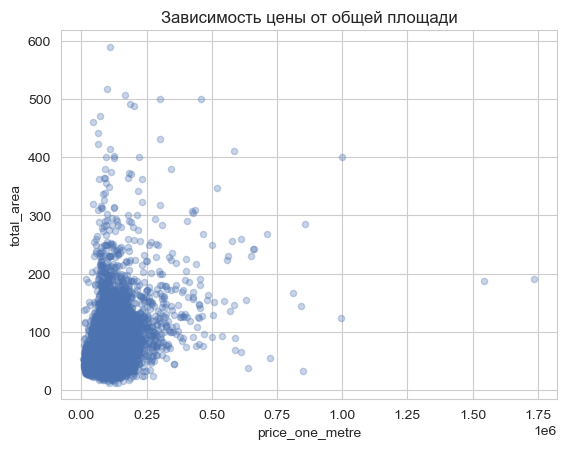

In [52]:
print('Корреляция  общая цена/ общая площадь = ', data['last_price'].corr(data['total_area']))
print('Корреляция цена за 1 кв м/ общая площадь = ', data['price_one_metre'].corr(data['total_area']))
data.plot(kind='scatter', x='price_one_metre', y='total_area', grid=True, alpha=0.3, style='o', title='Зависимость цены от общей площади' );
plt.show()


Корреляция =  0.20149215318101735


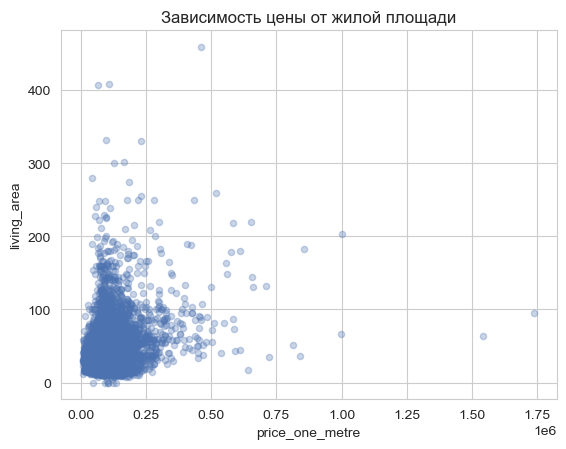

In [54]:
print('Корреляция = ', data['price_one_metre'].corr(data['living_area']))
data.plot(kind='scatter', x='price_one_metre', y='living_area', grid=True, alpha=0.3, style='o', title='Зависимость цены от жилой площади' );
plt.show()



Корреляция =  0.34755001673554226


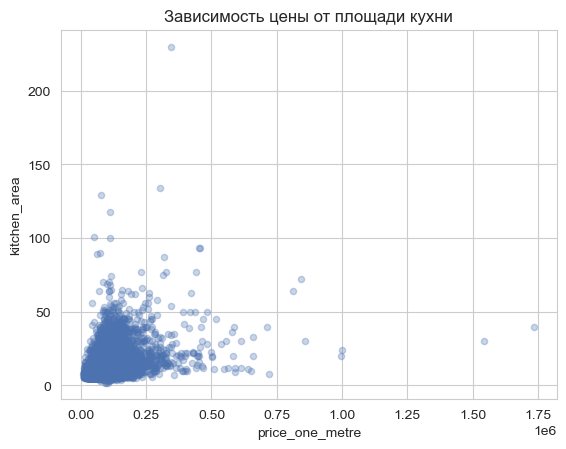

In [55]:
print('Корреляция = ', data['price_one_metre'].corr(data['kitchen_area']))
data.plot(kind='scatter', x='price_one_metre', y='kitchen_area', grid=True, alpha=0.3, style='o', title='Зависимость цены от площади кухни' );
plt.show()



Вывод: Мы можем отметить по корреляции и по графикам рассеивания, что зависимость цены за 1 кв м от общей площади/от жилой площади/от кухни имеется, но она очень маленькая: чем больше - тем немного выше цена  

Корреляция за кв м =  0.039763738561785
Корреляция за общую цену =  0.38946428280551665


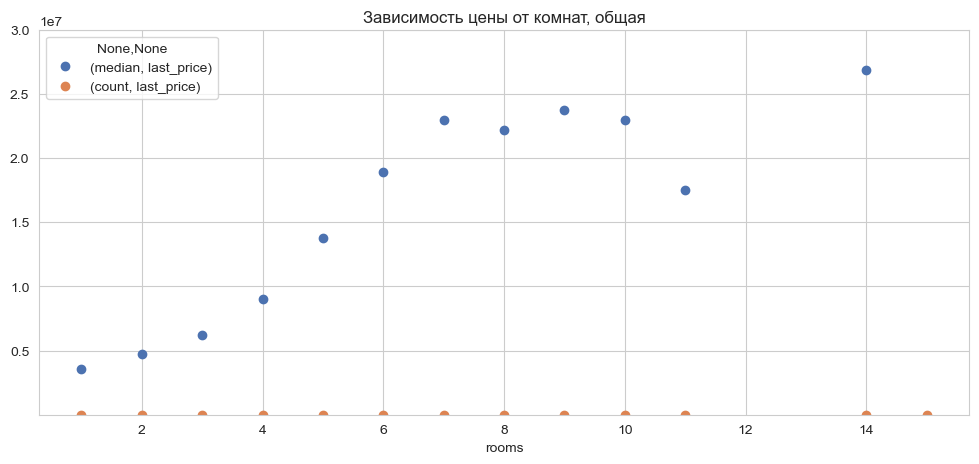

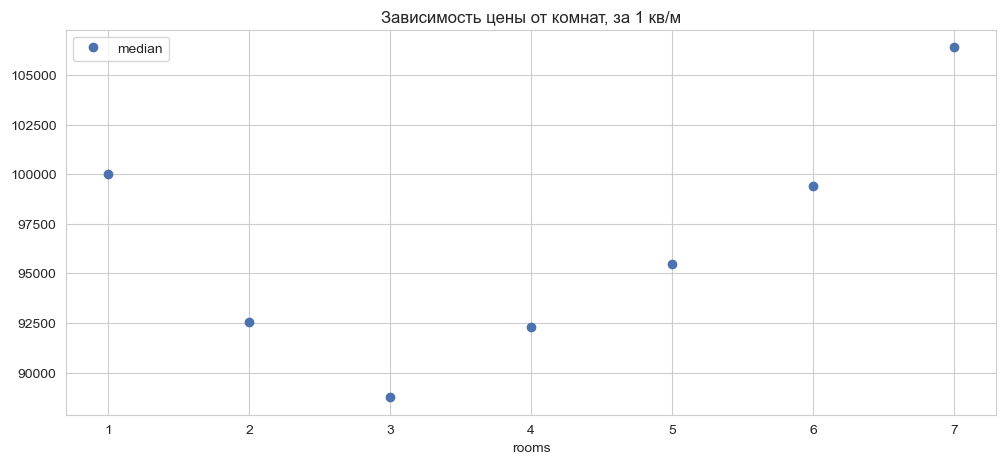

In [57]:
print('Корреляция за кв м = ', data['price_one_metre'].corr(data['rooms']))
print('Корреляция за общую цену = ', data['last_price'].corr(data['rooms']))
data.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'count']).plot(style='o', ylim=([1, 3.000000e+07]), grid=True, figsize=(12, 5), title='Зависимость цены от комнат, общая')
plt.show()

df_rooms = data.pivot_table(index='rooms', values='price_one_metre', aggfunc=['median', 'count'])
df_rooms.columns = ['median', 'count']

df_rooms.query('count > 20').plot(style='o', y = 'median', grid=True, figsize=(12, 5), title='Зависимость цены от комнат, за 1 кв/м');





Здесь мы видим что имеется зависимость цены от кол-ва комнат. Однушки подешевле, а остальные дороже.
Но мы видим что после 7 комнат цена на недвижимость не сильно меняется по сравнению с 8-10 комнатами
, значит нужно рассматривать другие показатели .

А что касается цены за 1 кв м, то чем ближе к 3х комнатным тем цена за 1 кв метр меньше.

                      mean  count   median
type_floors                               
другой       102923.979069  16674  98039.0
первый        81231.487692   2803  81009.0
последний     91193.902493   3169  87179.0


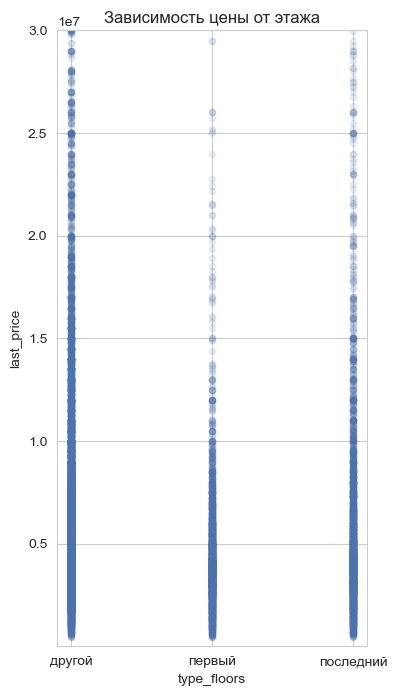

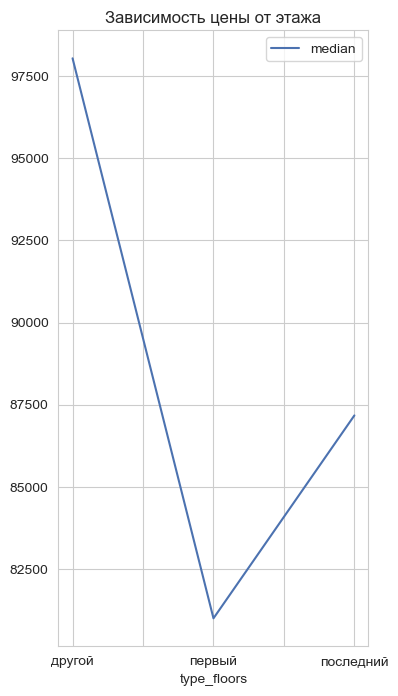

In [59]:
df_floor_cat = data.pivot_table(index = 'type_floors', values = 'price_one_metre', aggfunc = ['mean', 'count', 'median'])
df_floor_cat.columns = ['mean', 'count', 'median']
print(df_floor_cat)


data.plot(kind='scatter', x='type_floors', y='last_price', grid=True, alpha=0.1, style='o', figsize=(4,8), ylim=([1, 3.000000e+07]), title='Зависимость цены от этажа' );
plt.show()

df_floor_cat.plot(kind='line', y='median', grid=True, figsize=(4,8), title='Зависимость цены от этажа' );
plt.show()

Первый этаж по цене немного дешевле за 1 кв м чем остальные

Корреляция =  -0.26486256102138633
Корреляция =  -0.37283552745755405


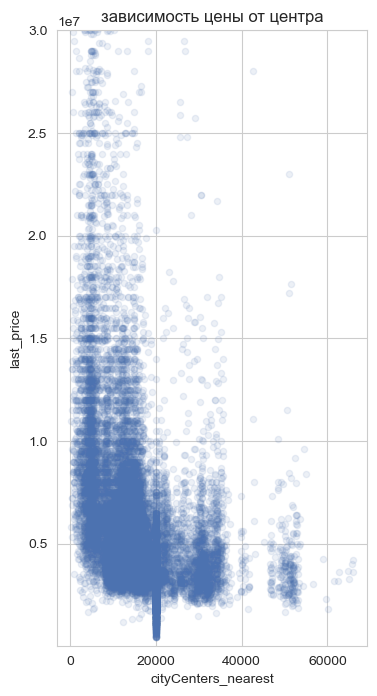

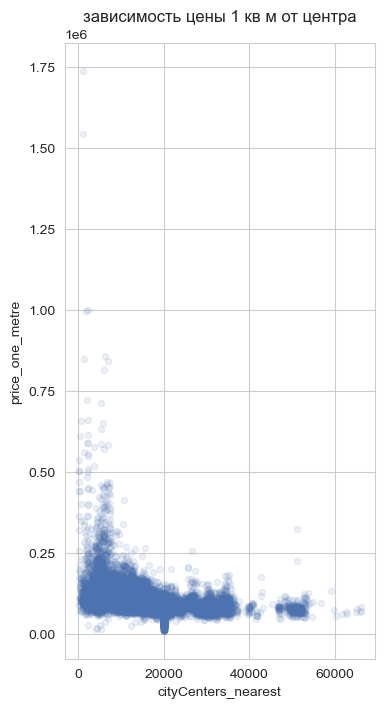

In [60]:
print('Корреляция = ', data['last_price'].corr(data['cityCenters_nearest']))
print('Корреляция = ', data['price_one_metre'].corr(data['cityCenters_nearest']))

data.plot(kind='scatter', x='cityCenters_nearest', y='last_price', grid=True, alpha=0.1, style='o', figsize=(4,8), ylim=([1, 3.000000e+07]), title='зависимость цены от центра' );
plt.show()

data.plot(kind='scatter', x='cityCenters_nearest', y='price_one_metre', grid=True, alpha=0.1, style='o', figsize=(4,8), title='зависимость цены 1 кв м от центра' );
plt.show()

Зависимость общей цены и цены за 1 кв м имеется. Чем ближе к центру тем больше 

колличество объявлений по годам year
2014     136
2015    1131
2016    2705
2017    7836
2018    8118
2019    2720
Name: year, dtype: int64


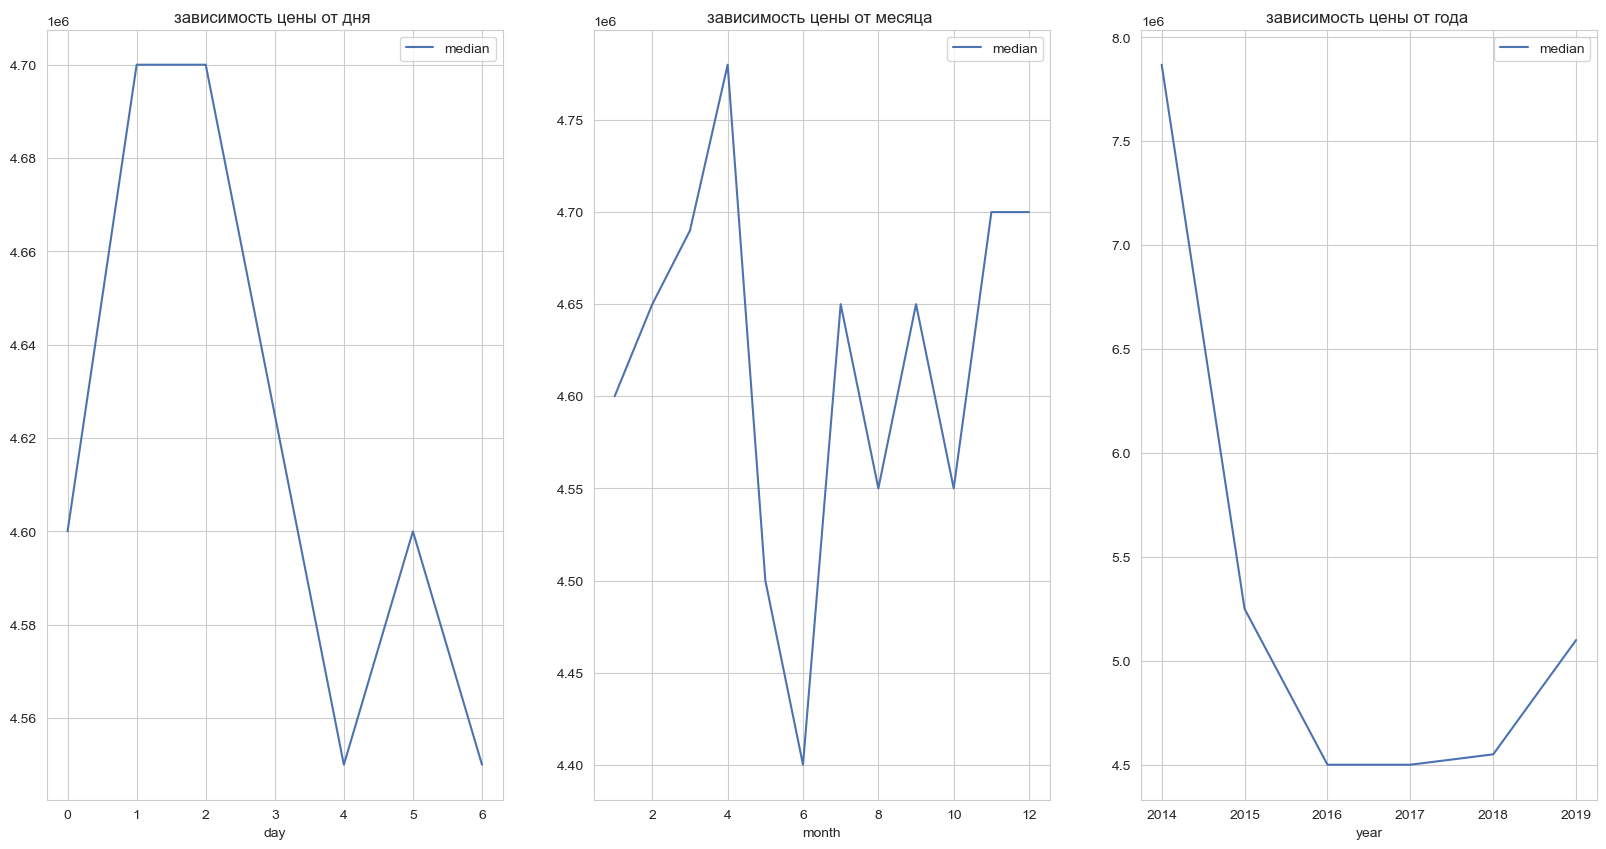

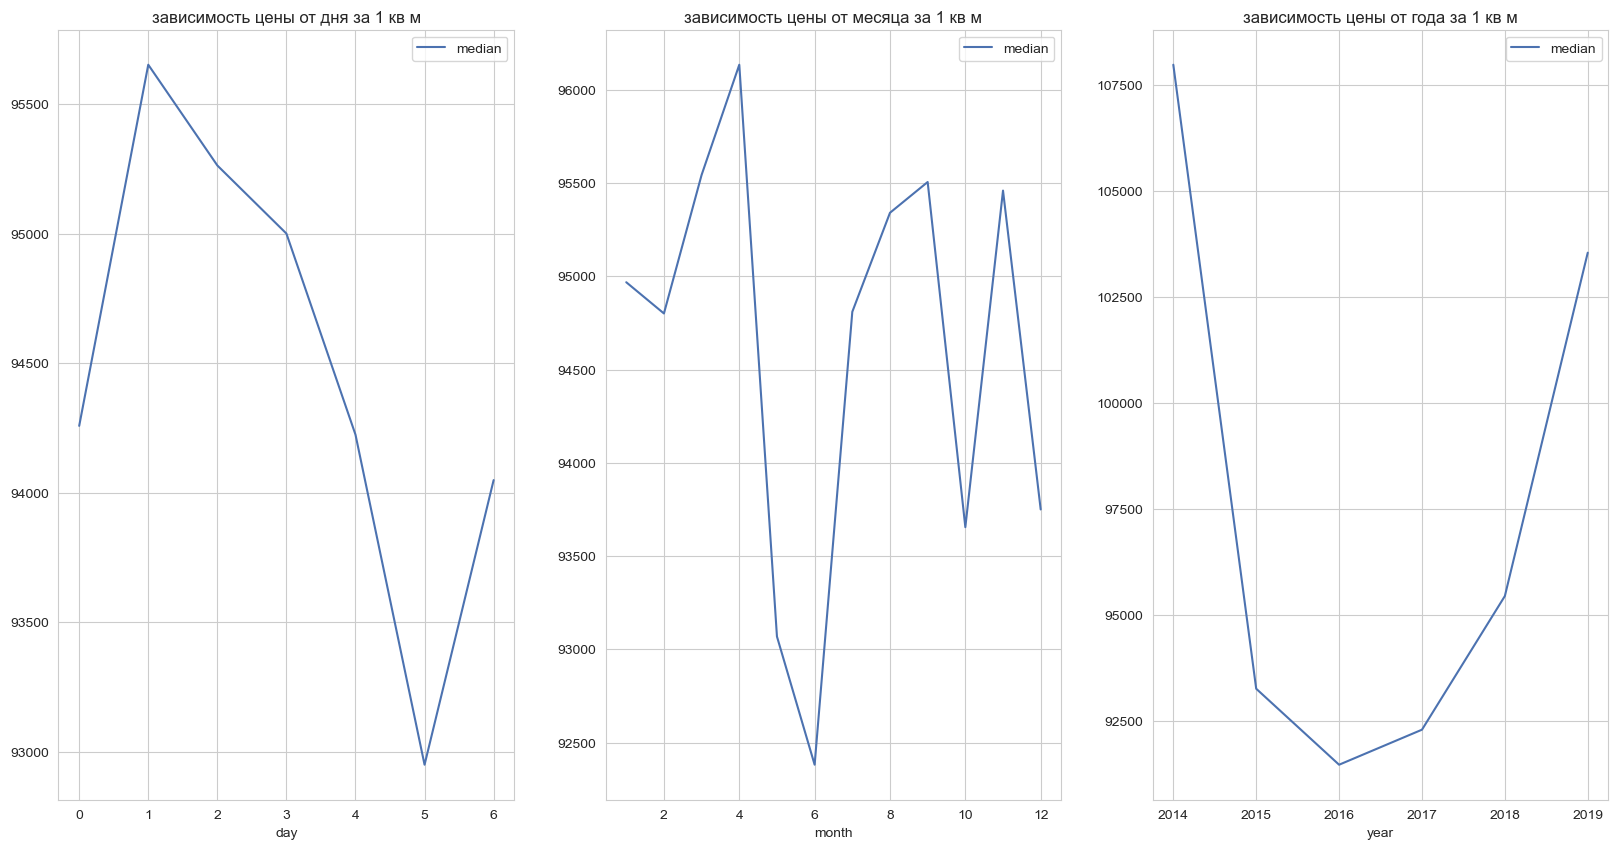

In [62]:

data_year = data.groupby('year')['year'].count()
print('колличество объявлений по годам', data_year)

df_day_l = data.pivot_table(index = 'day', values = 'last_price', aggfunc = ['count', 'median'])
df_day_l.columns = ['count', 'median']
df_mounth_l = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['count', 'median'])
df_mounth_l.columns = ['count', 'median']
df_year_l = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['count', 'median'])
df_year_l.columns = ['count', 'median']


fig, axes = plt.subplots(nrows=1, ncols=3)
df_day_l.plot(kind='line', y = 'median', grid=True, figsize=(20,10), title='зависимость цены от дня ', ax=axes[0] )
df_mounth_l.plot(kind='line', y = 'median', grid=True, figsize=(20,10), title='зависимость цены от месяца ', ax=axes[1] )
df_year_l.plot(kind='line', y = 'median', grid=True, figsize=(20,10), title='зависимость цены от года ', ax=axes[2] )

plt.show()

df_day = data.pivot_table(index = 'day', values = 'price_one_metre', aggfunc = ['count', 'median'])
df_day.columns = ['count', 'median']
df_mounth = data.pivot_table(index = 'month', values = 'price_one_metre', aggfunc = ['count', 'median'])
df_mounth.columns = ['count', 'median']
df_year = data.pivot_table(index = 'year', values = 'price_one_metre', aggfunc = ['count', 'median'])
df_year.columns = ['count', 'median']

fig, axes = plt.subplots(nrows=1, ncols=3)
df_day.plot(kind='line', y = 'median', grid=True, figsize=(20,10), title='зависимость цены от дня за 1 кв м', ax=axes[0] )
df_mounth.plot(kind='line', y = 'median', grid=True, figsize=(20,10), title='зависимость цены от месяца за 1 кв м', ax=axes[1] )
df_year.plot(kind='line', y = 'median', grid=True, figsize=(20,10), title='зависимость цены от года за 1 кв м', ax=axes[2] )
plt.show()

Если смотреть зависимость по 1 кв м то видим
- во вторник объявление с более высокими ценами. На выходных низкая, возможно просто люди не очень активные в выходные и нет на работе оценщиков/риэлторов и тд
- по месяцам Апрель в лидерах, а вот в мае и июне - низкие, возможно здесь просто люди на отдыхе. Что можно сказать - имеется сезонность
- по годам начиная с 16 года , с каждым годом цена за 1 кв м увеличивается.

Если смотреть зависимость по распределению общая цена, видим:
- пик пришелся на 17-18 год, разброс по ценам видем в 17-18 году больше чем в других.
- общая цена квартиры особо не влияет на день недели

**Анализ средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [63]:

df_local_name = data.pivot_table(index=['locality_name'], values='price_one_metre', aggfunc=['count'])
df_local_name.columns = ['count']
df_local_name = df_local_name.sort_values(by=['count'], ascending=False).head(10)

print('10 населённых пунктах с наибольшим числом объявлений')
print(df_local_name)

# объединяем таблицу с нашими пунктами
data_stat_price_metre = data.merge(df_local_name, on='locality_name')
#print(data_stat_price_metre.head())
data_stat_price_metre = data_stat_price_metre.pivot_table(index='locality_name', values='price_one_metre', aggfunc=['mean'])
data_stat_price_metre.columns = ['price_one_metre']

data_stat_price_metre.sort_values(by=['price_one_metre'], ascending=False).\
style.highlight_max(color='yellow', subset=['price_one_metre']).highlight_min(color='green', subset=['price_one_metre'])


10 населённых пунктах с наибольшим числом объявлений
                   count
locality_name           
санкт-петербург    14922
поселок мурино       533
поселок шушары       431
всеволожск           389
пушкин               355
колпино              323
поселок парголово    319
гатчина              294
деревня кудрово      291
выборг               230


,price_one_metre
locality_name,
санкт-петербург,114008.521043
пушкин,102833.721127
деревня кудрово,92386.707904
поселок парголово,90133.119122
поселок мурино,85483.127580
поселок шушары,78572.610209
колпино,75355.291022
всеволожск,68850.835476
гатчина,68842.513605


Мы видим что наибольшая цена за квадратный метр в Санкт-Петербурге = 114189.1 руб , а наименьшая в Выборге = 58285.0 руб.
Что составляет в 2 раза.
Данные рассматривались в 10 населённых пунктах с наибольшим числом объявлений.

**Вычисление в Санкт-Петербурге среднюю цену каждого километра**

Необходимо вычислить среднюю цену каждого километра. И описать, как стоимость объектов зависит от расстояния до центра города.
Простыми словами - удаленность до центра

In [64]:
sample_SP_city = data.query('locality_name == "санкт-петербург"')
sample_SP_city['cityCenters_kilometers'].isna().sum()

print(sample_SP_city.shape[0], sample_SP_city['cityCenters_kilometers'].isna().sum(), (sample_SP_city['cityCenters_kilometers'].isna().sum()/sample_SP_city.shape[0]).round(3), sample_SP_city['cityCenters_kilometers'].min(), sample_SP_city['cityCenters_kilometers'].max())
print(sample_SP_city['cityCenters_kilometers'].dtype)

14922 60 0.004 0.0 29.0
float64


- Видим что есть значения Nan , но их очень мало, порядка 0.4 % - поэтому удалим их
- с пропущенными значениями разобрались, поэтому переведем в int для удобства рассчетов и построения сводных графиков
- посмотрим среднюю цену каждого километра
- Что такое центр ? Берем за основу радиус в 3 км, думаю это логично, дальше уже далековато будет

14922 60 0.0 29.0
int32
14862 0 0 29
                        price_one_metre
cityCenters_kilometers                 
0                         258428.440000
1                         173147.513043
2                         162568.424710
7                         155421.731646
6                         148498.605442
5                         138685.024887
27                        132115.500000
4                         129405.051829
8                         124575.050788
3                         121112.515528
9                         113345.139085
10                        111775.067548
11                        108981.981498
13                        108259.958126
12                        107569.699869
15                        104382.155570
14                        104271.342532
16                        100362.573421
19                         98405.085526
17                         96312.502427
18                         95635.368000
21                         94578.723214
25 

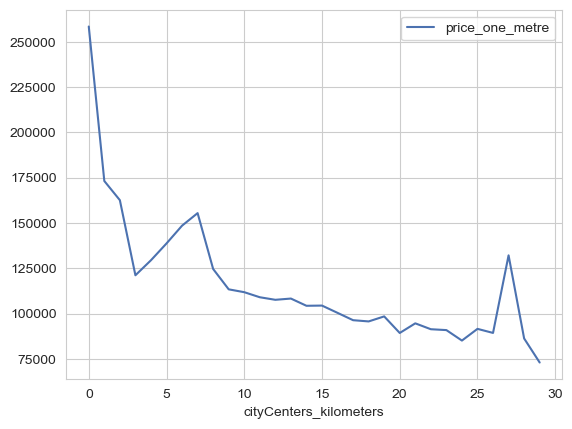

In [65]:

print(sample_SP_city.shape[0], sample_SP_city['cityCenters_kilometers'].isna().sum(), sample_SP_city['cityCenters_kilometers'].min(), sample_SP_city['cityCenters_kilometers'].max())
sample_SP_city = sample_SP_city.dropna(subset=['cityCenters_kilometers'])

sample_SP_city['cityCenters_kilometers'] = sample_SP_city['cityCenters_kilometers'].astype('int')
print(sample_SP_city['cityCenters_kilometers'].dtype)

print(sample_SP_city.shape[0], sample_SP_city['cityCenters_kilometers'].isna().sum(), sample_SP_city['cityCenters_kilometers'].min(), sample_SP_city['cityCenters_kilometers'].max())

print(sample_SP_city.pivot_table(index='cityCenters_kilometers', values='price_one_metre', aggfunc='mean').sort_values(by=['price_one_metre'], ascending=False))
sample_SP_city.pivot_table(index='cityCenters_kilometers', values='price_one_metre', aggfunc='mean').plot();


По таблице и графику видно что в радиусе 10 км цены за квадратный метр дорогие, есть небольшой скачек с 25-30 км от центра, но он не настолько большой по сравнению с ценами в центре, можно предположить что там находится очень крутой заповедник или это остров

In [66]:
sample_SP_city = sample_SP_city.query('cityCenters_kilometers <= 3')


Давайте посмотрим теперь зависимости
- цена / количество комнат
- цена / этаж
- стоимости квадратного метра от удаленности от центра
- зависимость цены от дня месяца года

корреляция =  -0.03860269938982448


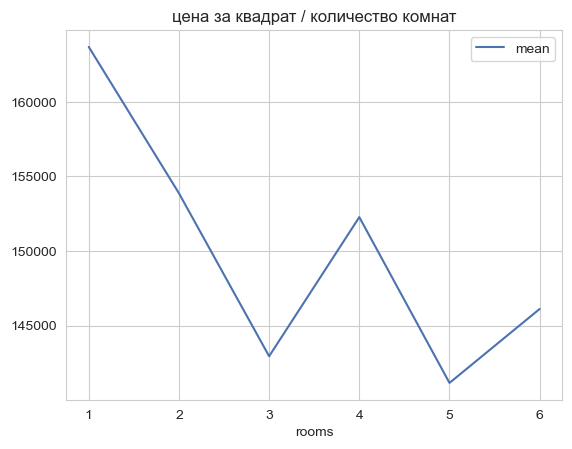

In [67]:
sample_SP_city_room = sample_SP_city.pivot_table(index = 'rooms', values = 'price_one_metre', aggfunc = ['count', 'mean', 'median'])
sample_SP_city_room.columns = ['count', 'mean', 'median']

# уберем кол-во обяъвелений меньше 20 и построим график

print('корреляция = ', sample_SP_city['rooms'].corr(sample_SP_city['price_one_metre']))

sample_SP_city_room.query('count > 20').plot(y = 'mean', grid=True, title='цена за квадрат / количество комнат');



В целом можно сказать что в центре города однушки (особенно) и двушки - цена за квадрат дорогая, как и в других городах..
Хотя корреляция маленькая очень - но если посмотреть на график и на среднее то мы видим полную картину.


                  mean  count    median
type_floors                            
другой       157105.78    451  119522.0
последний    142961.92    173  113253.0
первый       122567.07     97  106838.0


<Axes: title={'center': 'цена за квадрат / тип этажа'}, xlabel='type_floors'>

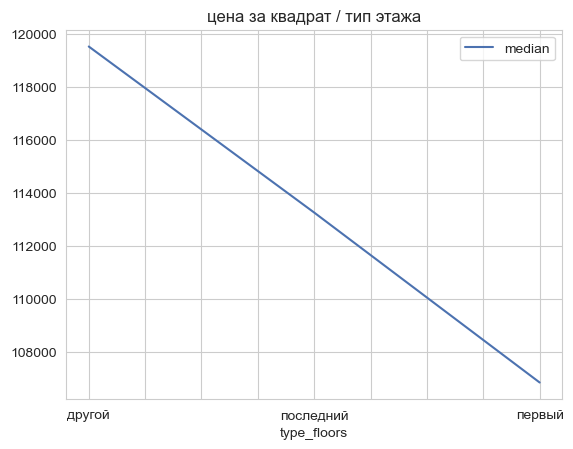

In [68]:
#sample_SP_city.columns
sample_SP_city_floor = sample_SP_city.pivot_table(index = 'type_floors', values = 'price_one_metre', aggfunc = ['mean', 'count', 'median']).round(2)
sample_SP_city_floor.columns = ['mean', 'count', 'median']
sample_SP_city_floor = sample_SP_city_floor.sort_values(by=['mean'], ascending=False)
print(sample_SP_city_floor)                                                                                                              
sample_SP_city_floor.plot(y='median', grid=True, title='цена за квадрат / тип этажа')


Видим что на первом этаже в центре города квартиры дешевле, на последнем дороже, на других еще дороже но не на много

корреляция =  -0.1944321230961365


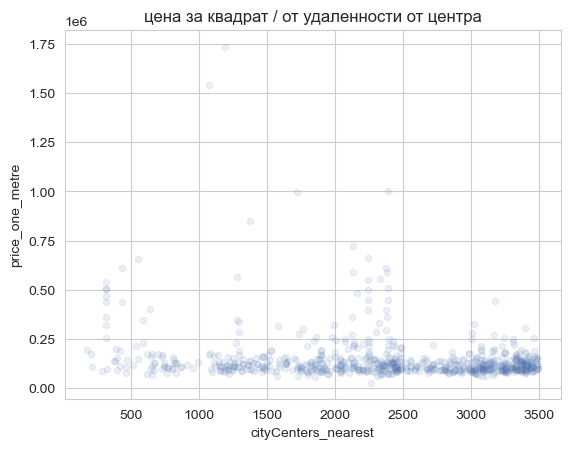

In [69]:
print('корреляция = ',sample_SP_city['cityCenters_nearest'].corr(sample_SP_city['price_one_metre']))
sample_SP_city.plot(kind='scatter',  x='cityCenters_nearest', y='price_one_metre', grid=True, alpha=0.1, style='o', title='цена за квадрат / от удаленности от центра');
plt.show()

Не видно зависимости по метрам от удаленности в радиусе 3 км

таблица распределения по дню недели в центре СП
              mean  count    median
day                                
0    157506.082569    109  126180.0
1    153446.991071    112  110965.0
2    140273.559322    118  110676.0
3    165188.794872    156  115699.5
4    138410.748148    135  121569.0
5    138135.163265     49  120000.0
6    127287.976190     42  101591.0
таблица распределения по месяцу в центре СП
                mean  count    median
month                                
1      140171.897436     39  117245.0
2      146302.931818     88  116000.0
3      154735.400000     75  117742.0
4      176167.706667     75  127049.0
5      121040.342105     38  105849.5
6      134762.550000     40  109687.5
7      138616.701493     67  114655.0
8      155696.333333     42  110868.5
9      142881.283582     67  116822.0
10     153204.481481     54  124509.0
11     140965.410256     78  113391.0
12     166535.206897     58  121580.0
таблица распределения по году в центре СП
          

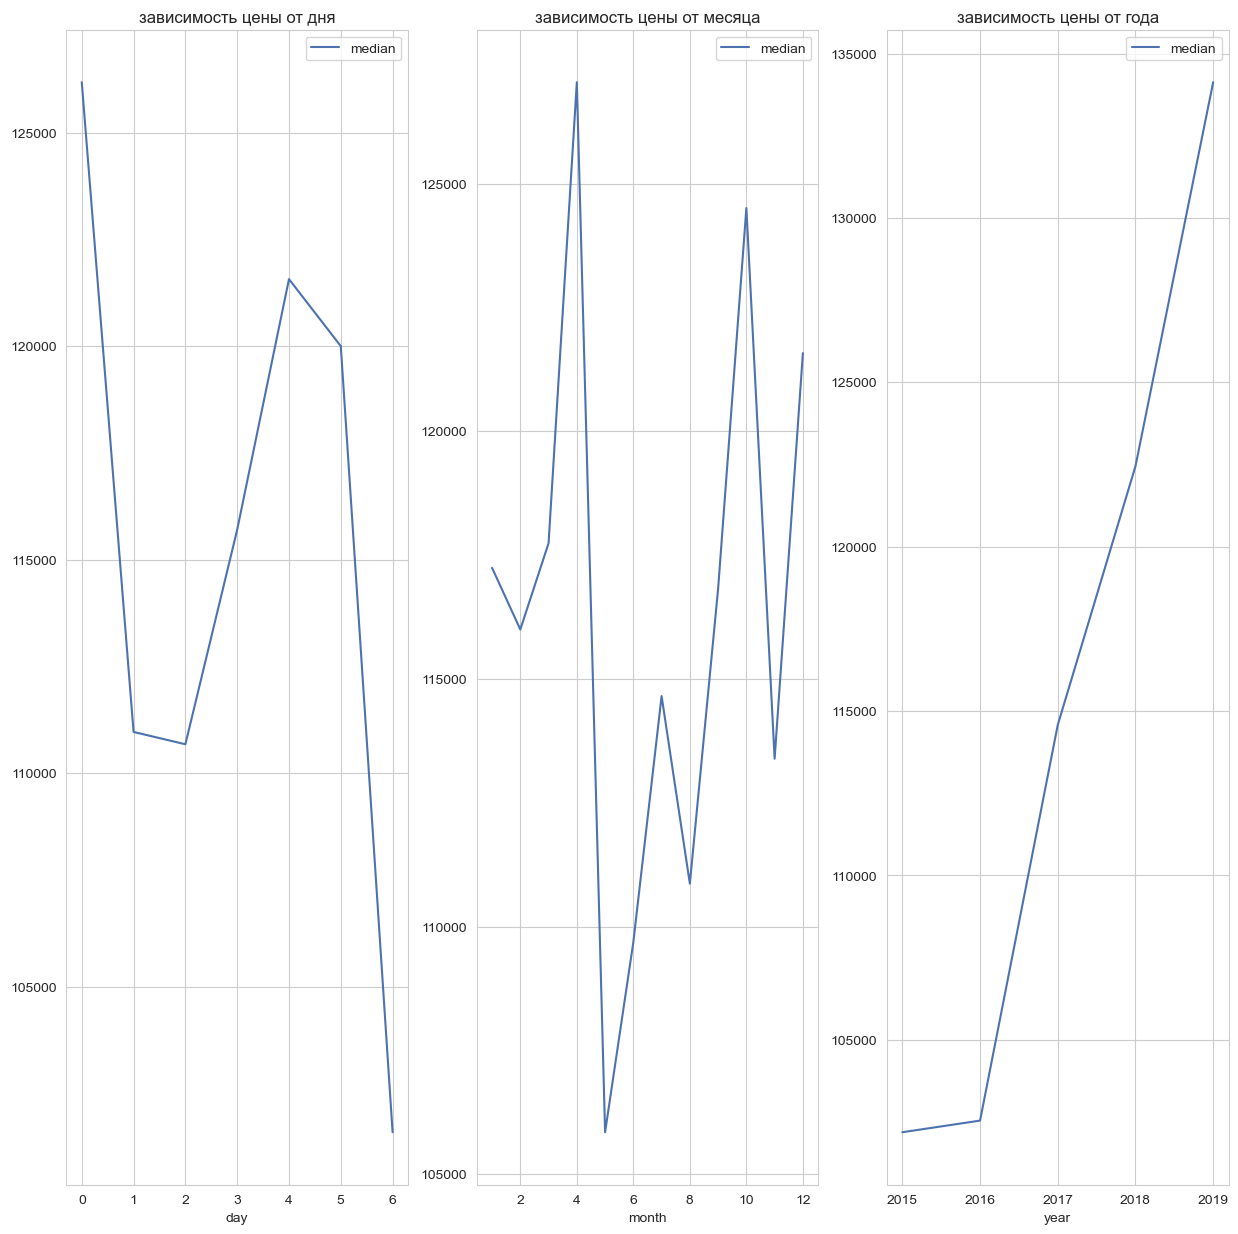

In [70]:
#print(sample_SP_city.head())

sample_SP_city_day = sample_SP_city.pivot_table(index = 'day', values = 'price_one_metre', aggfunc = ['mean', 'count', 'median'])
sample_SP_city_day.columns = ['mean', 'count', 'median']
print('таблица распределения по дню недели в центре СП')
print(sample_SP_city_day)

sample_SP_city_mounth = sample_SP_city.pivot_table(index = 'month', values = 'price_one_metre', aggfunc = ['mean', 'count', 'median'])
sample_SP_city_mounth.columns = ['mean', 'count', 'median']
print('таблица распределения по месяцу в центре СП')
print(sample_SP_city_mounth)

sample_SP_city_year = sample_SP_city.pivot_table(index = 'year', values = 'price_one_metre', aggfunc = ['mean', 'count', 'median'])
sample_SP_city_year.columns = ['mean', 'count', 'median']
# уберем года с маленькими запросами на продажу иначе график некрасивый
sample_SP_city_year = sample_SP_city_year.query('count > 50')
print('таблица распределения по году в центре СП')
print(sample_SP_city_year)


fig, axes = plt.subplots(nrows=1, ncols=3)
sample_SP_city_day.plot(y = 'median',  grid=True, alpha=1, title='зависимость цены от дня', ax=axes[0], figsize=(15,15),)
sample_SP_city_mounth.plot(y = 'median',  grid=True, alpha=1, title='зависимость цены от месяца', ax=axes[1], figsize=(15,15),)
sample_SP_city_year.plot(y = 'median',  grid=True, alpha=1, title='зависимость цены от года', ax=axes[2], figsize=(15,15),)


plt.show()




**Вывод**

- видим что в воскресенье минимальные цены за кв метр, а в понедельник максимальные, наверное обратились к оценщику который был на работе в понедельник. Также заметно что в цетверг цена немного выбивается от остальных
- если смотреть по месячно, видим что в апреле самая высокая цена за кв метр, самая низкая в мае - как и говорил ранее в мае все отдыхают
- цены за метр в центре Питера растут из года в год , в отличие от всей выборке по таблице (исследование выше)

### Общий вывод

Мы получили в распоряжение данные сервиса Яндекс Недвижимость - архив за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Выполнили предобработку и изучили данные:
- обработали пропущенные значения
- заменили типы данных
- Удалили лишнее и аномалии
- Изучили уникальные значения 
- Нашли и устранили редкие и выбивающиеся значения

Добавили в таблицу 
- цену квадратного метра жилья, 
- день недели публикации объявления, месяцы и года размещения объявлений, 
- добавили категорию по этажам квартир. 
- добавили расстояние до центра города в километрах

Изучили параметры на наличие аномальных значений - площадь, цена, число комнат, высота потолков. 
Были определены аномалии в данных параметрах. Увидели что некоторые объявления имеют конкретные дни снятия, и такую дату удалили из иследований, т.к. ее с большой долей вероятности нельзя считать датой продажи.
Нормальные значения продажи квартир варьируются от 6 до 600 дней. 
На цену кв метра оказывают зависимость 
- количество комнат 
- этаж квартиры 
- близость к центру

Также начиная с 2016 года цена за 1 кв м в объявлениях растет. А вот в центре она ростет всегда. 
Также можно отметить что учитывая выборку за период 2014-2019 года мы смотрели средние/медианные показатели по рынку в целом. Возможно анолигичные квартиры которые были в объявлениях стоили по разному в разные года.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод